In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('d:\Coffe_sales.csv')
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [3]:
df.shape

(3547, 11)

In [4]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


# **Data Cleaning**

In [6]:
df.isna().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [7]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [ ]:
df['Time_of_Day'] = df['Weekday'] + df['Month_name']

In [8]:
df[['Time_of_Day']]

,Time_of_Day
0,Morning
1,Afternoon
2,Afternoon
3,Afternoon
4,Afternoon
...,...
3542,Morning
3543,Afternoon
3544,Afternoon
3545,Afternoon


In [9]:
df.select_dtypes(include='number').describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [10]:
df['Weekday'].replace(0.0, 3.5, inplace=True)

In [11]:
df['Weekday'].mode()

0    Tue
Name: Weekday, dtype: object

In [12]:
df['Date'].value_counts()

Date
2024-10-11    26
2025-02-03    25
2025-02-05    24
2024-09-22    24
2024-07-30    24
              ..
2024-11-24     1
2024-05-13     1
2025-01-06     1
2024-03-31     1
2024-03-24     1
Name: count, Length: 381, dtype: int64

In [13]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

# **Data Visualisation**

## 1. Coffee popularity Distribution

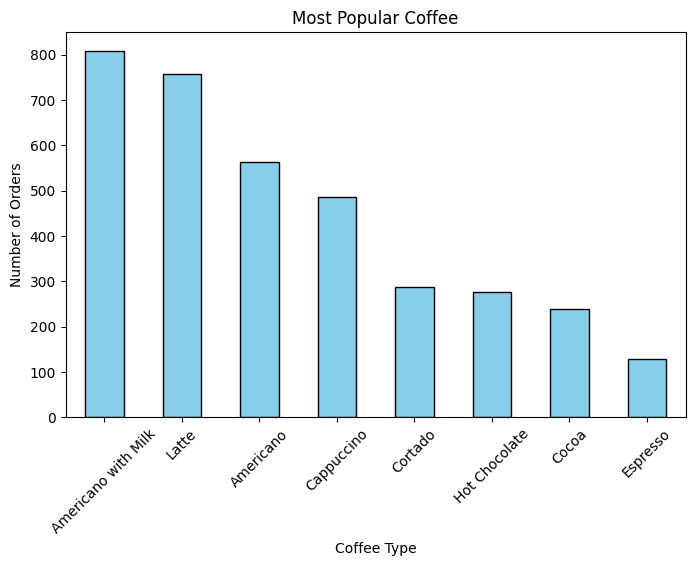

In [14]:
plt.figure(figsize=(8,5))
df['coffee_name'].value_counts().plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Most Popular Coffee")
plt.xlabel("Coffee Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

## 2. Time of Day Sales

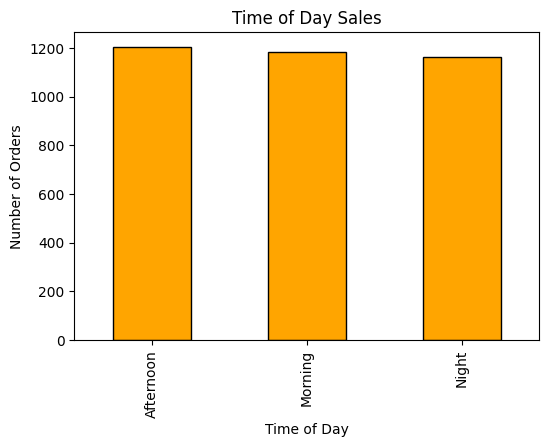

In [16]:
plt.figure(figsize=(6,4))
df['Time_of_Day'].value_counts().plot(kind='bar', color="orange", edgecolor="black")
plt.title("Time of Day Sales")
plt.xlabel("Time of Day")
plt.ylabel("Number of Orders")
plt.show()

## 3. Sales by Weekday

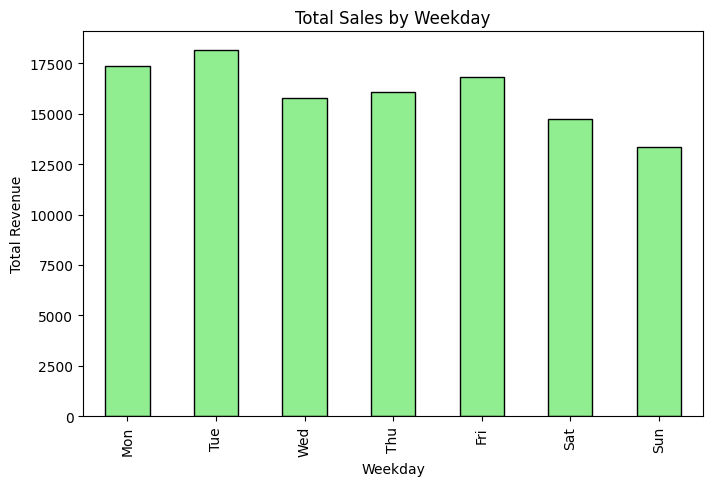

In [17]:
plt.figure(figsize=(8,5))
df.groupby("Weekday")['money'].sum().reindex(
    ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
).plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Total Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Revenue")
plt.show()

## 4. Payment Method

<function matplotlib.pyplot.show(close=None, block=None)>

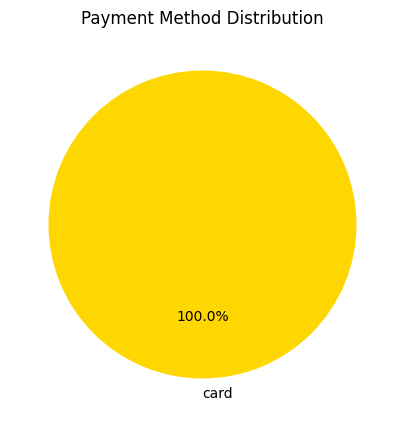

In [18]:
plt.figure(figsize=(5,5))
df['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["gold","lightblue"])
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show

##  5. Monthly Sales Trend 

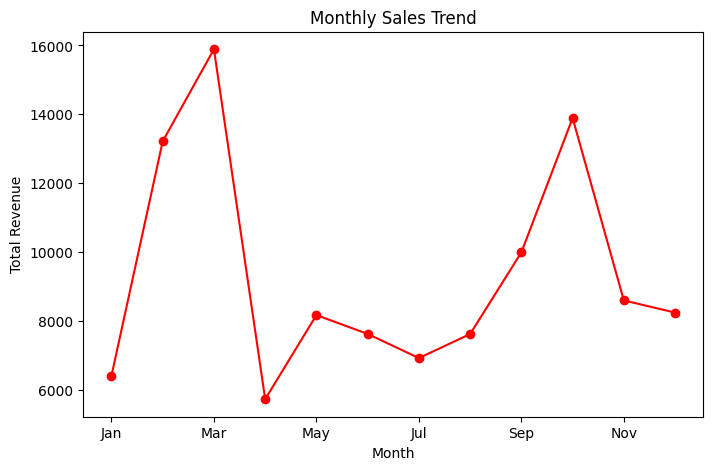

In [20]:
plt.figure(figsize=(8,5))
df.groupby("Month_name")['money'].sum().reindex(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
).plot(kind='line', marker="o", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


##  6. Hourly Sales

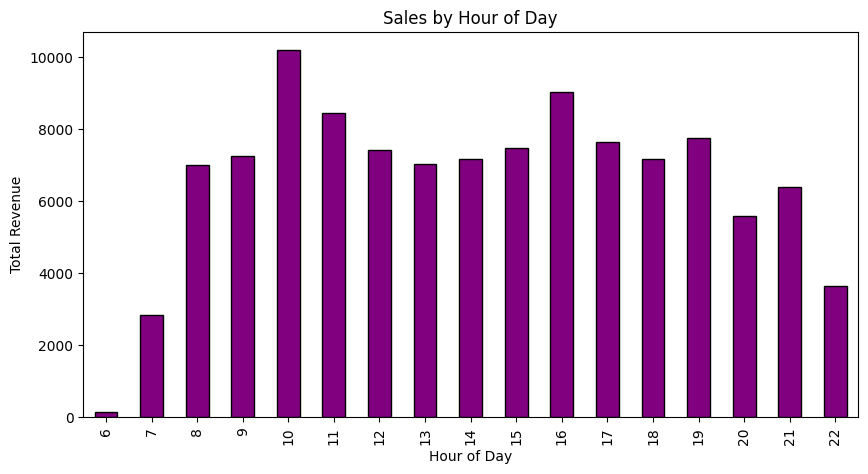

In [22]:
plt.figure(figsize=(10,5))
df.groupby("hour_of_day")['money'].sum().plot(kind='bar', color="purple", edgecolor="black")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.show()

## 1. Boxplot - Coffee Type vs Sales

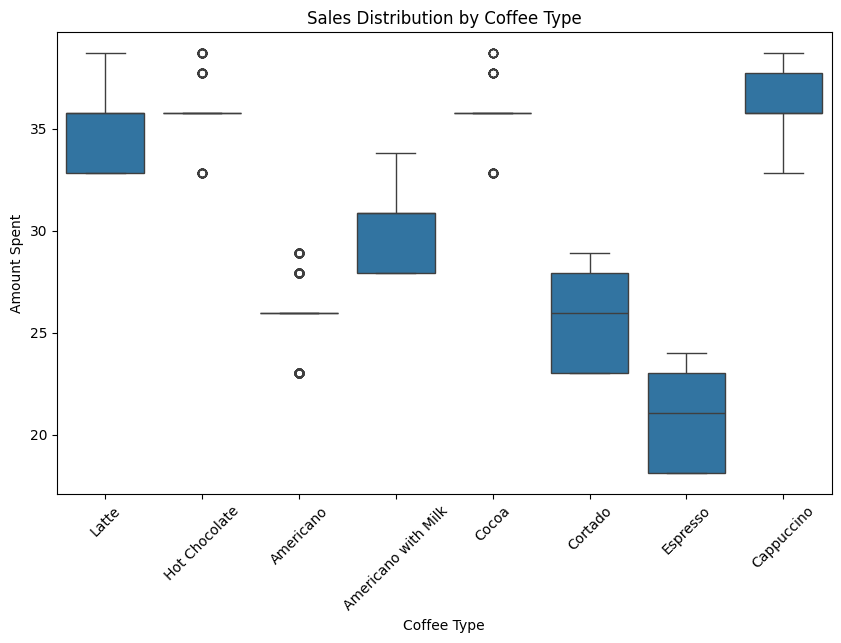

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="coffee_name", y="money", data=df)
plt.title("Sales Distribution by Coffee Type")
plt.xlabel("Coffee Type")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.show()


# 2. Boxplot - Time of Day vs Sales

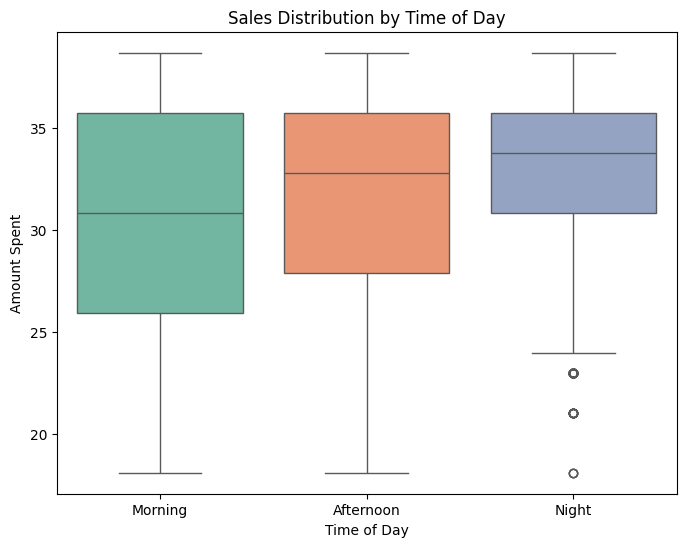

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Time_of_Day", y="money", data=df, palette="Set2")
plt.title("Sales Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Amount Spent")
plt.show()

# 3. Boxplot - Weekday vs Sales

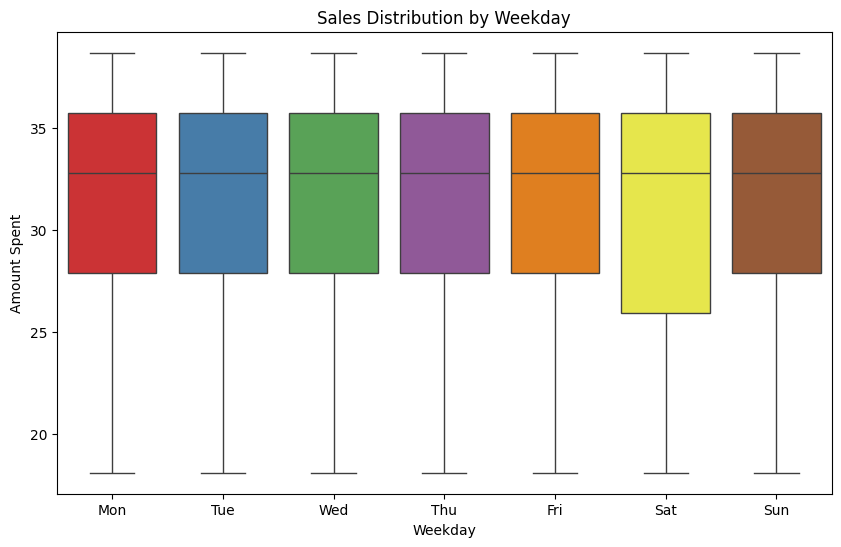

In [27]:
weekday_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.figure(figsize=(10,6))
sns.boxplot(x="Weekday", y="money", data=df, order=weekday_order, palette="Set1")
plt.title("Sales Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Amount Spent")
plt.show()


# 4. Boxplot - Payment Method vs Sales

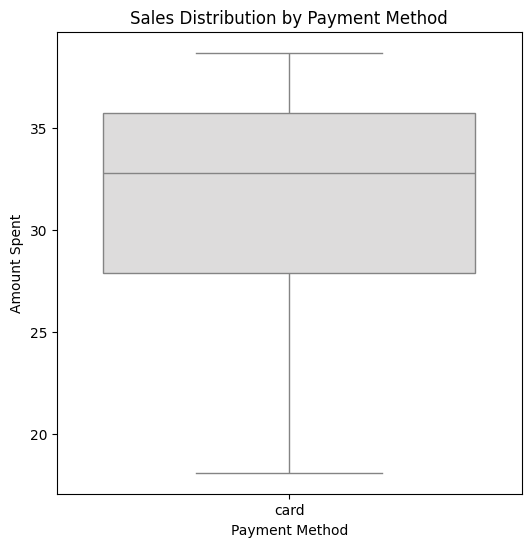

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x="cash_type", y="money", data=df, palette="coolwarm")
plt.title("Sales Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Amount Spent")
plt.show()

In [28]:
le_cash = LabelEncoder()
le_time = LabelEncoder()
le_weekday = LabelEncoder()
le_month = LabelEncoder()

df['cash_type_enc'] = le_cash.fit_transform(df['cash_type'])
df['Time_of_Day_enc'] = le_time.fit_transform(df['Time_of_Day'])
df['Weekday_enc'] = le_weekday.fit_transform(df['Weekday'])
df['Month_name_enc'] = le_month.fit_transform(df['Month_name'])

In [29]:
le_coffee = LabelEncoder()
df['coffee_enc'] = le_coffee.fit_transform(df['coffee_name'])

In [33]:
X = df[['hour_of_day','cash_type_enc','Time_of_Day_enc','Weekday_enc','Month_name_enc']]
y = df['coffee_enc']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
y_pred = model.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_coffee.classes_))

Accuracy: 0.2507042253521127

Classification Report:
                      precision    recall  f1-score   support

          Americano       0.24      0.13      0.17       128
Americano with Milk       0.26      0.50      0.34       163
         Cappuccino       0.13      0.02      0.04        90
              Cocoa       0.00      0.00      0.00        45
            Cortado       0.00      0.00      0.00        48
           Espresso       0.00      0.00      0.00        20
      Hot Chocolate       0.00      0.00      0.00        60
              Latte       0.25      0.49      0.34       156

           accuracy                           0.25       710
          macro avg       0.11      0.14      0.11       710
       weighted avg       0.17      0.25      0.19       710

